## 第三章 基于观测器的残差生成

  一般来说，基于模型的故障诊断包括两个步骤：残差生成和残差评价。残差生成的主要任务是根据系统的数学模型生成能够反映故障影响的残差信号。残差评价的主要任务是通过对残差信号进行分析实现故障诊断。在基于模型的故障诊断研究中，残差生成方法是核心研究内容。本章介绍基于龙伯格观测器的残差生成方法。

### 3.1 基于解析冗余的残差生成

既然基于模型的故障诊断是利用系统的解析模型进行故障诊断，那么一个很自然的想法是能不能直接利用系统的标称模型生成残差进行故障诊断？这种直接利用标称模型生成残差的思想如{numref}`图1`所示。

```{figure} ./image/Fig3-1.jpg
:height: 200px
:name: 图1

直接利用标称模型生成残差
```

虽然这看起来是一种简单直观的方法，在有些情况下也是可行的，但是这种方法是有问题的。首先，如果被诊断系统的系统矩阵$A$是不稳定的，则由标称模型得到的残差信号将会发散。其次，即使对于$A$稳定的被诊断系统，利用标称模型的残差生成器的性能完全取决于$A$矩阵特征值的位置。从控制理论的观点来看，直接利用标称模型的残差生成器是开环的，所以存在上述问题。为了使得初值误差的影响逐渐收敛于零，并且设计者可以调节残差生成器的性能，需要在残差生成器中引入反馈，如{numref}`图2`所示。

```{figure} ./image/Fig3-2.jpg
:height: 200px
:name: 图2

采用反馈结构的残差生成器
```

### 3.2 基于观测器的连续时间系统的残差生成

考虑如下的连续时间系统

$$
\left\{ \begin{array}{l}
\dot{x}(t) = Ax(t)+Bu(t)+B_f f(t) \\
y(t) = Cx(t) +D_f f(t)(t) 
\end{array} \right. 
$$ (eq3.1)
其中$x(t)\in \mathbb{R}^{n_x}$是状态向量，$u(t)\in \mathbb{R}^{n_u}$是控制输入，$y(t)\in \mathbb{R}^{n_y}$是测量输出，$f(t)\in \mathbb{R}^{n_f}$表示故障向量。$A$, $B$, $C$, $B_f$和$D_f$是具有适当维度的已知常数矩阵。

对于式{eq}`eq3.1`中的被诊断系统，其基于龙伯格观测器的残差生成器具有如下形式

$$
\left\{ \begin{array}{l}
\dot{\hat{x}}(t) = A\hat{x}(t)+Bu(t)+L(y(t)- C \hat{x}(t))  \\
r(t) = y(t) - C\hat{x}(t)
\end{array} \right. 
$$ (eq3.2)
其中$\hat{x}(t)\in \mathbb{R}^{n_x}$是状态估计向量，$r(t)\in \mathbb{R}^{n_y}$是残差向量，$L \in \mathbb{R}^{n_x \times n_y} $是待设计的观测器增益矩阵。

基于观测器的残差生成器设计的基本任务是设计$L$使得在无故障时，残差$r(t)$逐渐收敛于零。

为了设计基于观测器的残差生成器，首先要进行误差分析。定义如下的状态估计误差

$$
e(t) = x(t) -\hat{x}(t) 
$$ (eq3.3)

根据{eq}`eq3.1`和{eq}`eq3.2`可得

$$
\dot{e}(t) = (A-LC)e(t) +B_f f(t) -L D_f f(t) 
$$ (eq3.4)

我们希望误差方程在无故障时渐近稳定，从而使得残差在无故障时收敛于零。无故障时的误差方程为

$$
\dot{e}(t) = (A-LC)e(t) 
$$ (eq3.5)


基于式{eq}`eq3.5`中的误差方程，定义如下的李雅普诺夫函数

$$
V(t) =  e^T(t) P e(t)
$$ (eq3.6)
其中$P=P^T\succ 0$是一个对称正定矩阵。根据李雅普诺夫稳定性理论，如果对于所有的$e(t)\neq 0$时，都有$\dot{V}(t)<0$成立，则误差系统{eq}`eq3.5`是渐近稳定的。

由式{eq}`eq3.5`可得

$$ 
\dot{V}(t) =  e^T(t) ( (A-LC)^T P+P (A-LC)  )e(t) 
$$ (eq3.7)
由此可知，如果存在一个对称正定矩阵$P\succ 0$使得

$$
(A-LC)^T P+P (A-LC)  \prec 0 
$$ (eq3.8)
成立，则误差系统{eq}`eq3.5`是渐近稳定的。也就是说，残差生成器{eq}`eq3.2`的设计条件是找到矩阵$P$和$L$使得如下矩阵不等式成立

$$
P \succ 0 
$$ (eq3.9)
$$
(A-LC)^T P+P (A-LC)  \prec 0 
$$ (eq3.10)

式{eq}`eq3.10`中的设计条件中存在$PL$项，并非标准的线性矩阵不等式，还需要进一步将其转化为便于求解的标准线性矩阵不等式形式。令$L=P^{-1}W$，可将{eq}`eq3.10`转化为

$$
A^TP -C^T W^T+P A-WC  \prec 0 
$$ (eq3.11)

此时，可以使用线性矩阵不等式工具箱\cite{Lofberg2004chapter3,Zhang2016chapter3}求解。若{eq}`eq3.9`和{eq}`eq3.11`存在可行解，则可由$L=P^{-1}W$确定观测器的增益矩阵$L$。

接下来，以一个简单的数值算例说明基于观测器的残差生成。

考虑式{eq}`eq3.1`中的系统，其中参数矩阵为

$$
A = \begin{bmatrix}
0 & 1 & 0\\
-1 & -2 & 1 \\
0 & -1 & -2 
\end{bmatrix},\,
B = \begin{bmatrix}
0 & 0  \\
0 & -1 \\
1 & 1
\end{bmatrix},\,
B_f = \begin{bmatrix}
0    \\
0   \\
1 
\end{bmatrix},
C = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0
\end{bmatrix},\, 
D_f = \begin{bmatrix}
0 & 0   \\
0 &   0
\end{bmatrix}
$$

接下来，介绍在Python中设计基于观测器的残差生成器，并进行仿真的过程。在设计观测器之前，需要首先定义系统的参数：

In [139]:
import numpy as np

A = np.array([[0,1,0],
              [-1,-2,1],
              [0,-1,-2]])
B = np.array([[0,0],
              [0,-1],
              [1,1]])
Bf = np.array([[0],
              [0],
              [1]])
C = np.array([[1,0,0],
              [0,1,0]])

针对此系统，构造式{eq}`eq3.2`{cite}`1393890,zhang2016robust`中的观测器来生成残差。求解{eq}`eq3.9`和{eq}`eq3.11`中的线性矩阵不等式
并由$L=P^{-1}W$求解得观测器的增益矩阵$L$。

In [140]:
import cvxpy as cp

# 定义矩阵变量P和W
P = cp.Variable((3, 3), symmetric=True)
W = cp.Variable((3, 2))
# 定义需要求解的LMI问题
constraints = [P >> 0.001*np.eye(3)]
constraints += [(P@A - W@C) + (P@A - W@C).T << -0.001*np.eye(3)]
prob = cp.Problem(cp.Minimize(0),constraints)
# 求解LMI
prob.solve()
# 求矩阵L
P = P.value
W = W.value
L = np.linalg.inv(P)@W

利用上述程序可以得到如下的增益矩阵

$$
L = \begin{bmatrix}
0.5000 &   -0.0597 \\
-0.0512  &  -1.5040 \\
0.0413 &   -0.0655
\end{bmatrix}
$$
然后即可进行数值仿真。

首先，设置仿真时间

In [141]:
t_max = 20
dt = 0.01
tspan = np.arange(0.0, t_max, dt) 
Nk = len(tspan)

为了便于数据的存储和读取，可以根据仿真时间预设数据存储的数组

In [142]:
# 被诊断对象的相关变量
x = np.zeros((3,Nk))
u = np.zeros((2,Nk))
y = np.zeros((2,Nk))
# 残差生成器相关变量
xhat = np.zeros((3,Nk))
r = np.zeros((2,Nk))

然后，可以对相关变量进行初始化

In [143]:
x[:,[0]] = np.array([[0],[0],[0.1]]) 
y[:,[0]] = C@x[:,[0]]
xhat[:,[0]] = np.array([[0],[0],[0]]) 
r[:,[0]] = y[:,[0]] - C@xhat[:,[0]]

仿真中，被诊断系统的状态初值和观测器的初始估计值为

$$
x(0) = \begin{bmatrix}
0\\
0\\
0.1
\end{bmatrix} ,\, \,
\hat{x}(0) = \begin{bmatrix}
0\\
0 \\
0 
\end{bmatrix} 
$$

接下来可以进行数值仿真。首先考虑无故障时的残差生成。

In [144]:
for k in range(1,Nk):
    dx = A@x[:,[k-1]] + B@u[:,[k-1]]
    x[:,[k]] = x[:,[k-1]] + dx*dt
    y[:,[k]] = C@x[:,[k]]
    dxhat = A@xhat[:,[k-1]] + L@(y[:,[k-1]] - C@xhat[:,[k-1]])
    xhat[:,[k]] = xhat[:,[k-1]] + dxhat*dt
    r[:,[k]] = y[:,[k]] - C@xhat[:,[k]]

在仿真循环结束后，可以通过如下指令可以画出残差信号

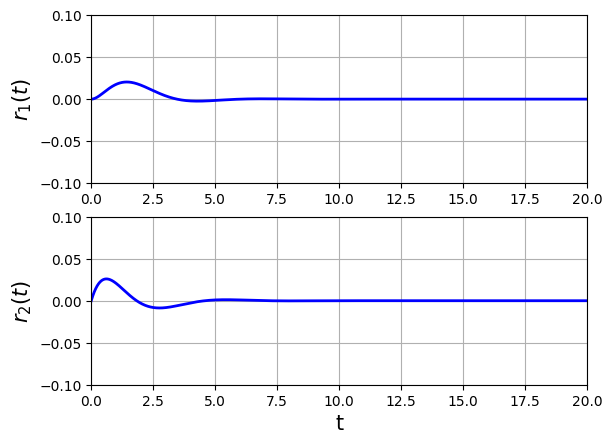

In [145]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plt.plot(tspan,r[[0],:].T,'b', linewidth=2)
plt.ylim([-0.1,0.1])
plt.xlim([0,20])
plt.ylabel('$r_1(t)$', fontsize=15)
plt.grid()
plt.subplot(212)
plt.plot(tspan,r[[1],:].T,'b', linewidth=2)
plt.ylim([-0.1,0.1])
plt.xlim([0,20])
plt.xlabel('t', fontsize=15)
plt.ylabel('$r_2(t)$', fontsize=15)
plt.grid()
plt.show()

在无故障的情况下，所得到的残差如上图所示。可以看出，最开始残差受到初始估计误差的影响，但最终收敛于零。

接下来，进行有故障情况下的数值仿真。考虑如下形式的故障

$$
f(t) =\left\{ \begin{array}{ll}
0  \, &   \, t< 5 \\
1  \, &   \, t\geq 5
\end{array} \right.
$$

在仿真时间和仿真初始条件不变的情况下，采用如下的仿真代码

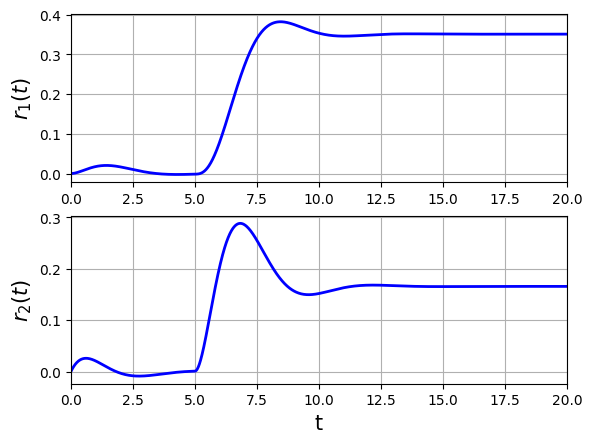

In [146]:
for k in range(1,Nk):
    if dt*k > 5:
        f = 1
    else:
        f = 0
    dx = A@x[:,[k-1]] + B@u[:,[k-1]] + Bf*f
    x[:,[k]] = x[:,[k-1]] + dx*dt
    y[:,[k]] = C@x[:,[k]]
    dxhat = A@xhat[:,[k-1]] + L@(y[:,[k-1]] - C@xhat[:,[k-1]])
    xhat[:,[k]] = xhat[:,[k-1]] + dxhat*dt
    r[:,[k]] = y[:,[k]] - C@xhat[:,[k]]

plt.figure()
plt.subplot(211)
plt.plot(tspan,r[[0],:].T,'b', linewidth=2)
plt.xlim([0,20])
plt.ylabel('$r_1(t)$', fontsize=15)
plt.grid()
plt.subplot(212)
plt.plot(tspan,r[[1],:].T,'b', linewidth=2)
plt.xlim([0,20])
plt.xlabel('t', fontsize=15)
plt.ylabel('$r_2(t)$', fontsize=15)
plt.grid()

可以得到上图中的残差信号。可以看出，无故障时的残差会渐近收敛于零，而发生故障后会产生比较明显的变化，能够反映出故障的影响。

```{bibliography}
:style: unsrt
```